In [ ]:
#Fahmi Nanda Saputro
#1103200203

In [1]:
#menghubungkan google drive ke G-Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mengimport pandas
import pandas as pd

#mencari lokasi dataset di drive
file_path='/content/drive/MyDrive/dataset/cancer_data.csv'

#membaca dataset di dataframe
df=pd.read_csv(file_path)

#menampilkan baris dari dataset yang dipanggil
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#mengganti nama atribut Annual Income dan Spending Score dari dataset yang dipanggil
df=df.rename(columns={'Clump Thickness': 'Ketebalan gumpalan', 'Uniformity of Cell Size':'Ukuran Sel'})

#menampilkan lagi dataset yang diganti namanya
df.head()

,Sample code number,Ketebalan gumpalan,Ukuran Sel,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Drop kolom yang tidak diperlukan, di dataset ini Gender dihilangkan
df=df.drop(['Sample code number','Marginal Adhesion'],axis=1)

#mengecek kembali data yang diubah sebelumnya
print(df.head())

   Ketebalan gumpalan  Ukuran Sel  Uniformity of Cell Shape  \
0                   5           1                         1   
1                   5           4                         4   
2                   3           1                         1   
3                   6           8                         8   
4                   4           1                         1   

   Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
0                            2            1                3                1   
1                            7           10                3                2   
2                            2            2                3                1   
3                            3            4                3                7   
4                            2            1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

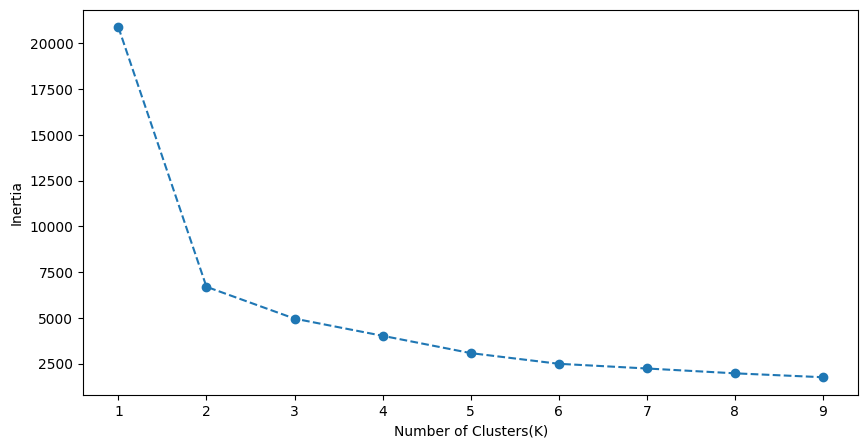

In [7]:
#Mengimpor library pyplot untuk membuat grafik dan K_means untuk pengelompokan data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Mengambil kolom Age, Annual Income, dan Spending Score dari dataframe
X=df[['Ketebalan gumpalan','Ukuran Sel','Bare Nuclei']]
#memntukan jumlah max cluster yang dieskplor
max_k=10
#daftar kosong yang akan digunakan untuk menyimpan nilai inersia
inertia_values=[]
#melakukan analisis elbow method untuk setiap jumlah kluster mulai dari 1 hingga max_k-1.
for k in range(1,max_k):
  kmeans=KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

#Menghasilkan grafik hasil dari pengulangan
plt.figure(figsize=(10,5))
plt.plot(range(1,max_k),inertia_values,marker='o',linestyle='--')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


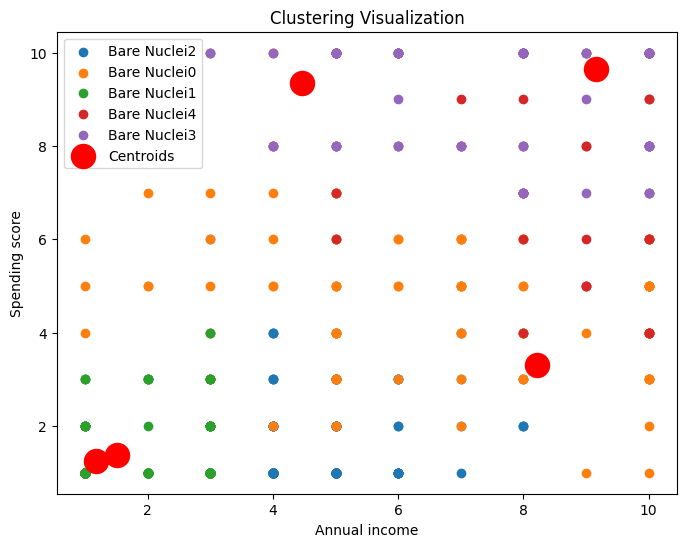

In [8]:
#menentukan jumlah kluster yang akan digunakan
n_clusters=5
#membuat objek K-Means dengan 5 kluster
kmeans=KMeans(n_clusters,random_state=0)
#menghitung kluster dan menambahkan label kluster ke DataFrame
df['label']=kmeans.fit_predict(X)
#membuat gambar (grafik) dengan ukuran yang ditentukan
plt.figure(figsize=(8,6))
#loop untuk menggambar setiap kluster dan menggambar titik-titik data dari setiap kluster
for label in df['label'].unique():
  plt.scatter(df[df['label']==label] ['Ketebalan gumpalan'],df[df['label']==label]['Ukuran Sel'],label=f'Bare Nuclei{label}')

#menambahkan titik merah yang mewakili pusat-pusat (centroids) dari setiap kluster.
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=300,c='red',label='Centroids')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [9]:
# mengimpor fungsi silhouette_score dari pustaka Scikit-Learn
from sklearn.metrics import silhouette_score
#membuat sebuah kamus kosong
silhouette_scores={ }
#loop for yang akan melakukan analisis Silhouette untuk jumlah kluster mulai dari 2 hingga 10.
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  silhouette_avg=silhouette_score(X,labels)
  silhouette_scores[k]=silhouette_avg
#loop yang digunakan untuk mencetak skor Silhouette untuk setiap jumlah kluster yang telah dihitung.
for k,silhoutte_avg in silhouette_scores.items():
  print(f"Silhoutte Score for k={k}:{silhoutte_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhoutte Score for k=2:0.6479953767697154
Silhoutte Score for k=3:0.6086186264624192
Silhoutte Score for k=4:0.46628692710564534
Silhoutte Score for k=5:0.4547461542132669
Silhoutte Score for k=6:0.46431403534034127
Silhoutte Score for k=7:0.473988848190046
Silhoutte Score for k=8:0.4768072979789683
Silhoutte Score for k=9:0.48681902336484717
Silhoutte Score for k=10:0.4848464432342134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
#mengimpor fungsi yang digunakan untuk menghitung skor Davies-Bouldin Index.
from sklearn.metrics import davies_bouldin_score
#mengimpor algoritma K-Means yang akan digunakan dalam pengelompokan data.
from sklearn.cluster import  KMeans
#membuat sebuah kamus kosong
dbi_scores={}
#melakukan analisis DBI untuk jumlah kluster mulai dari 2 hingga 10.
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    labels=kmeans.fit_predict(X)
    dbi=davies_bouldin_score(X,labels)
    dbi_scores[k]=dbi

#loop yang digunakan untuk mencetak skor Davies-Bouldin Index (DBI) untuk setiap jumlah kluster yang telah dihitung.
for k,dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}:{dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2:0.6337581597968417
Davies-Bouldin Index for k=3:0.893852354531332
Davies-Bouldin Index for k=4:0.8789411570484622
Davies-Bouldin Index for k=5:0.9503615365065302
Davies-Bouldin Index for k=6:0.8681198880590778
Davies-Bouldin Index for k=7:0.8710231604621963
Davies-Bouldin Index for k=8:0.8518955659216381
Davies-Bouldin Index for k=9:0.8697746274256639
Davies-Bouldin Index for k=10:0.8510262369876876


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
#mengimpor fungsi untuk menghitung skor Calinski-Harabasz Index.
from sklearn.metrics import calinski_harabasz_score
#mengimpor algoritma K-Means yang akan digunakan dalam pengelompokan data.
from sklearn.cluster import KMeans
#membuat sebuah kamus kosong
chi_scores={}
#melakukan analisis CHI untuk jumlah kluster mulai dari 2 hingga 10.
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,random_state=0)
  labels=kmeans.fit_predict(X)
  chi=calinski_harabasz_score(X,labels)
  chi_scores[k]=chi

# loop yang digunakan untuk mencetak skor Calinski-Harabasz Index (CHI) untuk setiap jumlah kluster yang telah dihitung.
for k,chi in chi_scores.items():
  print(f"Calinski-Harabasz Index for k={k}:{chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2:1441.21733756952
Calinski-Harabasz Index for k=3:1091.221885826196
Calinski-Harabasz Index for k=4:948.6299632808474
Calinski-Harabasz Index for k=5:980.8310387590662
Calinski-Harabasz Index for k=6:998.8654915907488
Calinski-Harabasz Index for k=7:939.3163749330013
Calinski-Harabasz Index for k=8:924.6460343253657
Calinski-Harabasz Index for k=9:915.8819124981718
Calinski-Harabasz Index for k=10:925.3243216855373


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
